#### Previsione del prezzo di un'azione con regressione lineare e support vector machine

https://www.youtube.com/watch?v=EYnC4ACIt2g&ab_channel=ComputerScience

In [821]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import yfinance as yf


importiamo i dati

In [822]:
start_date = '2014-5-31'
end_date = '2024-5-31'
df = yf.download('AMZN', start_date, end_date) 
#^GSPC

[*********************100%%**********************]  1 of 1 completed


In [823]:
len(df)

2517

In [824]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-06-02,15.629500,15.630000,15.350000,15.442000,15.442000,44068000
2014-06-03,15.287500,15.396000,15.253500,15.359500,15.359500,47584000
2014-06-04,15.342500,15.475000,15.192000,15.339000,15.339000,42142000
2014-06-05,15.405000,16.396999,15.345000,16.178499,16.178499,155934000
2014-06-06,16.250000,16.544001,16.246500,16.483500,16.483500,104880000
2014-06-09,16.578501,16.650000,16.282499,16.375000,16.375000,64244000
2014-06-10,16.382500,16.775000,16.375000,16.620501,16.620501,73268000
2014-06-11,16.799999,17.035999,16.694000,16.760000,16.760000,88736000
2014-06-12,16.777500,16.777500,16.233000,16.295500,16.295500,85526000


In [825]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-23,183.660004,184.759995,180.080002,181.050003,181.050003,33670200
2024-05-24,181.649994,182.440002,180.300003,180.750000,180.750000,27434100
2024-05-28,179.929993,182.240005,179.490005,182.149994,182.149994,29927000
2024-05-29,181.699997,184.080002,181.550003,182.020004,182.020004,32009300
2024-05-30,181.309998,181.339996,178.360001,179.320007,179.320007,29249200


Selezioniamo la colonna Adj Close

In [826]:
df = df[['Adj Close']]

In [827]:
len(df)

2517

In [828]:
df.head()

,Adj Close
Date,
2014-06-02,15.442000
2014-06-03,15.359500
2014-06-04,15.339000
2014-06-05,16.178499
2014-06-06,16.483500


In [829]:
# Creiamo una colonna con la variabile da prevedere
df.loc[:,'Prediction1'] = df['Adj Close'].shift(-1).values

C:\Users\utente\AppData\Local\Temp\ipykernel_13944\816681620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Prediction1'] = df['Adj Close'].shift(-1).values


In [830]:
df.head()

,Adj Close,Prediction1
Date,,
2014-06-02,15.442000,15.359500
2014-06-03,15.359500,15.339000
2014-06-04,15.339000,16.178499
2014-06-05,16.178499,16.483500
2014-06-06,16.483500,16.375000


In [831]:
df.tail()

,Adj Close,Prediction1
Date,,
2024-05-23,181.050003,180.750000
2024-05-24,180.750000,182.149994
2024-05-28,182.149994,182.020004
2024-05-29,182.020004,179.320007
2024-05-30,179.320007,NaN


#### Previsione prossimi 10 giorni

In [832]:
# Stabiliamo quanti "n" giorni in avanti vogliamo prevedere
forecast_out = 10
df.loc[:,'Prediction'] = df['Adj Close'].shift(-forecast_out)

C:\Users\utente\AppData\Local\Temp\ipykernel_13944\1223747075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Prediction'] = df['Adj Close'].shift(-forecast_out)


In [833]:
df.head()

,Adj Close,Prediction1,Prediction
Date,,,
2014-06-02,15.442000,15.359500,16.381001
2014-06-03,15.359500,15.339000,16.281000
2014-06-04,15.339000,16.178499,16.719000
2014-06-05,16.178499,16.483500,16.350000
2014-06-06,16.483500,16.375000,16.209999


In [834]:
df.tail(15)

,Adj Close,Prediction1,Prediction
Date,,,
2024-05-09,189.500000,187.479996,181.050003
2024-05-10,187.479996,186.570007,180.750000
2024-05-13,186.570007,187.070007,182.149994
2024-05-14,187.070007,185.990005,182.020004
2024-05-15,185.990005,183.630005,179.320007
2024-05-16,183.630005,184.699997,NaN
2024-05-17,184.699997,183.539993,NaN
2024-05-20,183.539993,183.149994,NaN
2024-05-21,183.149994,183.130005,NaN


Creiamo un data set indipendente (X), trasformando il df in un array
X = np.array(df.drop(['Prediction'],1))

In [835]:
X = np.array(df['Adj Close']).reshape(-1,1)
X

array([[ 15.44200039],
       [ 15.35949993],
       [ 15.33899975],
       ...,
       [182.1499939 ],
       [182.02000427],
       [179.32000732]])

In [836]:
# Eliminiamo le ultime "n" righe
X = X[:-forecast_out]

In [837]:
print(X)
# attenzione, abbiamo creato una lista di liste

[[ 15.44200039]
 [ 15.35949993]
 [ 15.33899975]
 ...
 [186.57000732]
 [187.07000732]
 [185.99000549]]


In [838]:
len(X)

2507

In [839]:
# Creiamo il data set dipendente (y)
# Creiamo un altro array (tutti i valori compresi gli NaN)
y = np.array(df['Prediction'])
print(y)

[16.38100052 16.28100014 16.71899986 ...         nan         nan
         nan]


In [840]:
# Eliminiamo gli NaN
y = y[:-forecast_out]
print(y)

[ 16.38100052  16.28100014  16.71899986 ... 182.1499939  182.02000427
 179.32000732]


In [841]:
len(y)

2507

Creiamo i due data set di addestramento e prova (train, test)

In [842]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [843]:
x_train

array([[159.00349426],
       [ 79.61949921],
       [166.73449707],
       ...,
       [ 78.6309967 ],
       [121.38999939],
       [ 40.94950104]])

In [844]:
y_train

array([153.78849792,  79.06999969, 165.59350586, ...,  80.14550018,
       142.08000183,  37.75249863])

### Support Vector Regressor

In [845]:
svr_rbf = SVR(kernel='rbf', C = 1e3, gamma = 0.1)

In [846]:
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

Testiamo il modello. L'indice di capacità del modello è il coefficiente di determinazione R^2 della previsione,  che indica la percentuale di variabilità nella variable dipendente spiegata dal modello. 

Il valore di R^2 è compreso fra un minimo di 0 e un massimo di 1

In [847]:
svm_confindence = svr_rbf.score(x_test, y_test)
print('svm_confindence: ', svm_confindence)

svm_confindence:  0.9833072125771892


### Modello di regressione lineare

In [848]:
lr = LinearRegression()

In [849]:
lr.fit(x_test, y_test)

LinearRegression()

Testiamo il modello. L'indice di capacità del modello è il coefficiente di determinazione R^2 della previsione, che indica la percentuale di variabilità nella variable dipendente spiegata dal modello.

Il valore di R^2 è compreso fra un minimo di 0 e un massimo di 1

In [850]:
lr_confindence = lr.score(x_test, y_test)
print('lr_confindence: ', lr_confindence)

lr_confindence:  0.9839900510224715


Creiamo la previsione degli ultimi 10 valori

In [851]:
x_forecast = np.array(df['Adj Close'])[-forecast_out:].reshape(-1,1)
print(x_forecast)

[[183.63000488]
 [184.69999695]
 [183.53999329]
 [183.1499939 ]
 [183.13000488]
 [181.05000305]
 [180.75      ]
 [182.1499939 ]
 [182.02000427]
 [179.32000732]]


Previsione dei prossimi n valori con il modello di regressione lineare

In [852]:
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[183.91027196 184.97665554 183.82056392 183.43187978 183.41195818
 181.33897105 181.03997974 182.43525223 182.30570099 179.61480963]


Previsione dei prossimi n valori con il modello support vector machine

In [853]:
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[176.48792595 179.29295523 176.08972806 174.37083969 174.28986998
 180.80256683 183.03665611 173.35802832 173.84417459 182.57021142]


Qual è la previsione migliore?

In [879]:
from sklearn.metrics import mean_squared_error
from math import sqrt

0.08102608918058615

In [855]:
lr_rmse = sqrt(mean_squared_error(x_forecast, lr_prediction))
print(lr_rmse)

0.28465081974339396


In [856]:
svm_rmse = sqrt(mean_squared_error(x_forecast, svm_prediction))
print(svm_rmse)

6.715430547381223


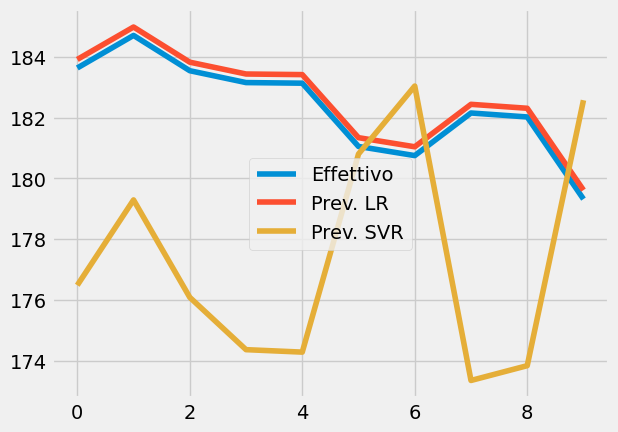

In [857]:
plt.plot(x_forecast, label = 'Effettivo')
plt.plot(lr_prediction, label = 'Prev. LR')
plt.plot(svm_prediction, label = 'Prev. SVR')
plt.grid(True)
plt.legend();


#### Previsione del prezzo di Ethereum con SVR
https://www.youtube.com/watch?v=HiDEAWdAif0&ab_channel=ComputerScience

In [858]:
from datetime import date, datetime
plt.style.use('fivethirtyeight')
#import pandas_datareader.data as web
import yfinance as yf
import pandas as pd


In [859]:
start_date = '2019-05-31'
end_date = '2024-05-31'
#end_date = datetime.today()

In [860]:
df = yf.download('ETH-USD', start_date, end_date) 

[*********************100%%**********************]  1 of 1 completed


In [861]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-31,256.015259,268.659943,249.111847,268.113556,268.113556,11255023515
2019-06-01,268.433350,273.557983,263.524597,265.391266,265.391266,9942869852
2019-06-02,265.512726,272.807220,265.041870,270.225525,270.225525,8744111713
2019-06-03,270.088562,270.334106,251.262192,252.607925,252.607925,9375712917
2019-06-04,252.511642,252.511642,236.127213,241.338791,241.338791,10132549747


In [862]:
future_days = 5

In [863]:
# Creiamo una  nuova colonna con i prezzi futuri

In [864]:
df[str(future_days) + '_Day_Price_Forecast'] = df[['Close']].shift(-future_days)

In [865]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,5_Day_Price_Forecast
Date,,,,,,,
2019-05-31,256.015259,268.659943,249.111847,268.113556,268.113556,11255023515,247.051010
2019-06-01,268.433350,273.557983,263.524597,265.391266,265.391266,9942869852,249.474335
2019-06-02,265.512726,272.807220,265.041870,270.225525,270.225525,8744111713,250.930359
2019-06-03,270.088562,270.334106,251.262192,252.607925,252.607925,9375712917,245.738098
2019-06-04,252.511642,252.511642,236.127213,241.338791,241.338791,10132549747,233.086700
2019-06-05,241.497040,248.138138,239.983459,247.051010,247.051010,8548917062,247.520126
2019-06-06,246.925247,249.944504,238.501114,249.474335,249.474335,8265146806,245.781830
2019-06-07,249.335281,254.352295,246.597900,250.930359,250.930359,8379534528,260.903290
2019-06-08,251.249313,252.377396,243.229111,245.738098,245.738098,7225996863,256.168793


In [866]:
df.tail(7)

,Open,High,Low,Close,Adj Close,Volume,5_Day_Price_Forecast
Date,,,,,,,
2024-05-24,3776.992432,3825.122559,3631.990234,3726.934570,3726.934570,22257061429,3763.196533
2024-05-25,3726.975586,3776.006592,3710.528320,3749.236572,3749.236572,10000027764,3746.849609
2024-05-26,3749.179932,3879.470703,3732.022949,3825.897461,3825.897461,14650794791,NaN
2024-05-27,3826.127197,3973.556396,3821.930420,3892.006836,3892.006836,18949181813,NaN
2024-05-28,3892.096924,3924.895752,3771.213867,3840.256348,3840.256348,19846044324,NaN
2024-05-29,3840.235107,3880.648438,3742.041260,3763.196533,3763.196533,17411416736,NaN
2024-05-30,3763.357666,3823.643311,3702.263672,3746.849609,3746.849609,15065849797,NaN


Creiamo il data set per la previsione

In [867]:
X = np.array(df[['Close']])
X = X[:df.shape[0] - future_days]

In [868]:
df.shape

(1827, 7)

In [869]:
df.shape[0]

1827

In [870]:
len(X)

1822

In [871]:
y = np.array(df[str(future_days) + '_Day_Price_Forecast'])

In [872]:
y = y[:-future_days]
print(y)

[ 247.05101013  249.47433472  250.93035889 ... 3840.25634766 3763.1965332
 3746.84960938]


Creiamo il data set di addestramento e test

In [873]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [874]:
svr_rbf = SVR(kernel='rbf', C = 1e3, gamma = 0.00001)
svr_rbf.fit(x_train,y_train)

SVR(C=1000.0, gamma=1e-05)

In [875]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf confidence score is: ', svr_rbf_confidence)

svr_rbf confidence score is:  0.9758509337653469


In [876]:
svm_prediction = svr_rbf.predict(x_test)

In [877]:
print(y_test)

[1191.52624512 1889.19165039 1849.04272461 1599.47668457  377.26885986
 2178.49902344 3830.38208008 3311.44189453  204.05578613 4439.35791016
  189.3125     4287.59375    1121.57092285 3431.08618164 3350.921875
 2746.38012695  659.2979126  3291.57763672 1664.74560547 1567.39868164
  130.80200195 3507.94433594 1723.15380859  435.07974243 1804.03930664
  229.26818848  228.19487    2933.47900391 1735.32128906 1816.45898438
 3261.91625977  395.88757324 3201.65209961 1237.59338379  344.50317383
 1100.1697998   170.80714417 1230.99060059  386.29516602 1817.54992676
 1633.62939453  169.13587952  241.51022339  151.26472473 1507.16589355
  364.83920288  239.45817566 3238.11157227 3453.49462891 1622.50585938
  265.40612793 4066.44506836  183.34835815  144.30415344 1866.75366211
 1632.25231934 2226.11425781  393.98736572  135.06936646  133.20181274
 1067.29882812 3735.22021484 2372.484375    188.61753845  151.71757507
 1868.04882812  229.9289093  2201.91137695  243.52529907  287.54711914
  133.61

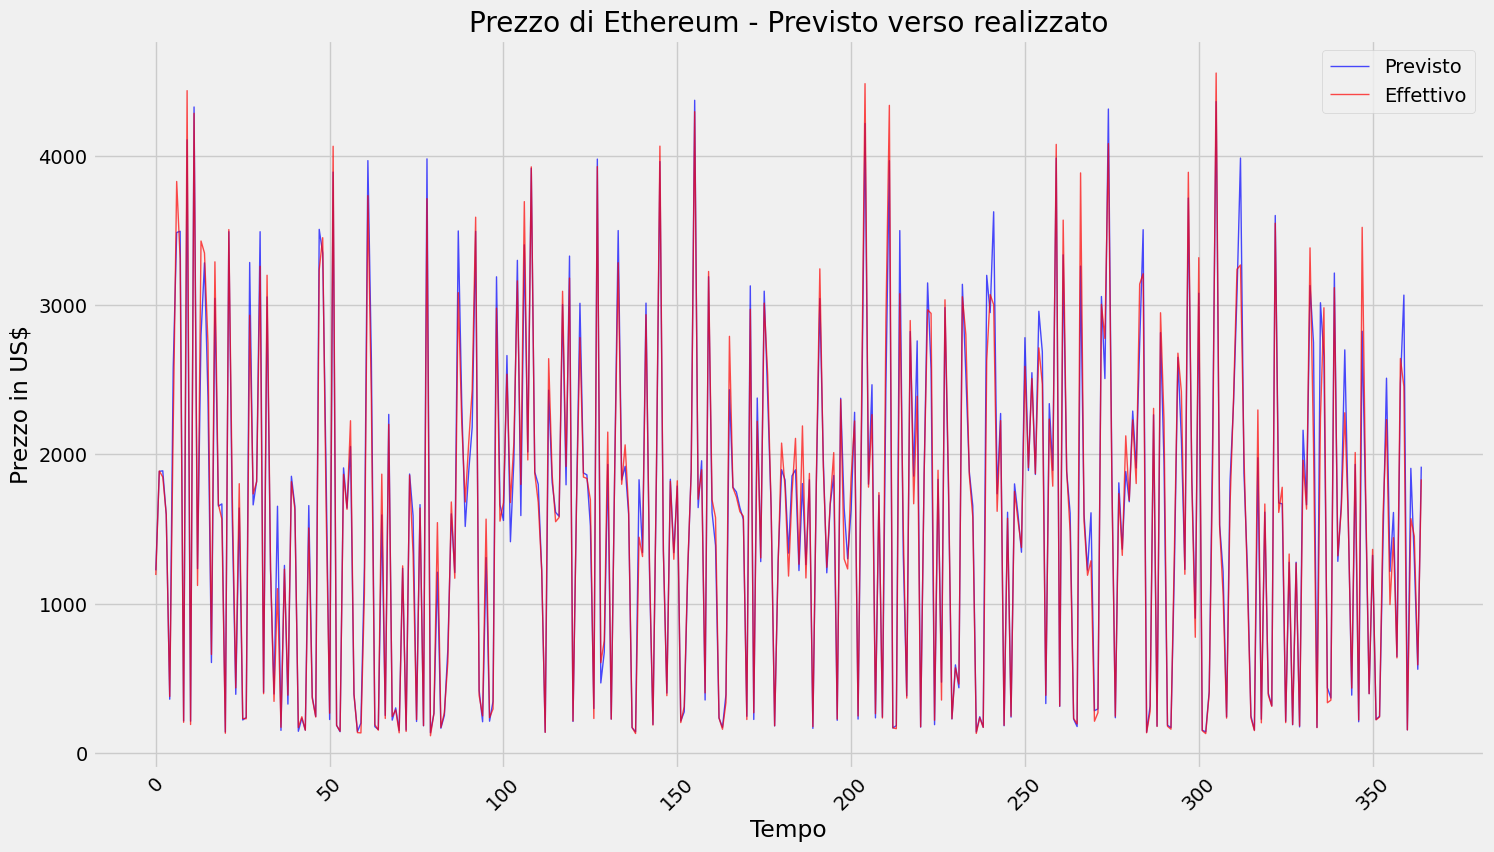

In [878]:
plt.figure(figsize=(16,9))
plt.plot(svm_prediction, label = 'Previsto', linewidth = '1', color ='b', alpha = .7)
plt.plot(y_test, label = 'Effettivo', linewidth = '1', color ='r', alpha = .7)
plt.title('Prezzo di Ethereum - Previsto verso realizzato')
plt.ylabel('Prezzo in US$')
plt.xlabel('Tempo')
plt.legend()
plt.xticks(rotation = 45)
plt.show();
